### Student Information
Name: NGUYEN VAN SA (阮文沙)

Student ID: F114156136

GitHub ID: Ethannguye

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

1. Setup and Load Data

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math 
import PAMI
import umap
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/admin/Documents/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


In [4]:
# Load the dataset
df = pd.read_csv('/Users/admin/Documents/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


2. Data Exploration

In [5]:
#Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [6]:
# Simplify dataset - keep necessary columns
df = df[['text','label']]
df

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
...,...,...
842,Invest now it is going to shoot up tomorrow,1.0
843,Where can I read this?,0.0
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,i sold my puts so i expect cheeto to declare w...,-1.0


In [7]:
#Add label_name
df['label_name'] = df['label'].map({-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'})
df

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,-1.0,negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative


In [8]:
# excercise 1: Print the first 3 examples of the 'text' column, each on a new line
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(df['text'].iloc[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [9]:
# a simple query
df[:10][["text","label_name"]]

,text,label_name
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [10]:
#query the last 10 records
df[-10:]

,text,label,label_name
837,Finance media lying \n\n*Surprise*,-1.0,negative
838,I am all in,0.0,neutral
839,The Art of the Deal…,0.0,neutral
840,Lol fr,0.0,neutral
841,So countries “begging to stop the tariffs” and...,1.0,positive
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative
846,![img](emote|t5_2th52|31224),0.0,neutral


In [11]:
# using loc (by label)
df.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [12]:
# using iloc (by position)
df.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [13]:
#using boolean indexing - excercise 2
df[df["label"] == -1][:10]

,text,label,label_name
0,Calls on retards,-1.0,negative
4,He didn’t say thank you.,-1.0,negative
6,Trump will respond to china increasing their t...,-1.0,negative
12,"Honestly let the economy burn, maybe people wi...",-1.0,negative
16,Jesus Christ,-1.0,negative
17,"Exactly this. Trump will blink first because, ...",-1.0,negative
18,Trump and dump,-1.0,negative
19,I think we are past the numbers. Just assume f...,-1.0,negative
20,Nooo dont go down its smug bull day,-1.0,negative
23,"I feel like these HFs took the word ""retard"" t...",-1.0,negative


In [14]:
#excercise : How many positive, negative and neutral posts are in the dataset?
df['label_name'].value_counts()

label_name
neutral     423
negative    315
positive    109
Name: count, dtype: int64

In [15]:
#excercise 3: Select every 10th negative post and display the first 5 of them.
df[df['label_name']=='negative'][::10][0:5]

,text,label,label_name
0,Calls on retards,-1.0,negative
25,"You see, Target, pissing off a good chunk of y...",-1.0,negative
62,Comedy gold :)),-1.0,negative
95,Japan and the UK are the two largest holders o...,-1.0,negative
125,Trump is like the annoying little brother (wit...,-1.0,negative


3.  Data Mining using Pandas

a. Missing Values

In [16]:
# check missing values
df.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [17]:

# check missing values with helper function
df.isnull().apply(lambda x: dmh.check_missing_values(df))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [18]:
#Calculate the missing values in every record instead of every column
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [19]:
# Create a dummy pandas Series
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])
dummy_series

text     dummy_record
label               1
dtype: object

In [20]:
dummy_series.to_frame().T

,text,label
0,dummy_record,1


In [21]:
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [22]:
# check if the records was commited into result
len(result_with_series)

848

In [23]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [24]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'label': 1
               }]

In [26]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [27]:
len(df)

849

In [28]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,2


In [29]:
df.dropna(inplace=True)


In [30]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [31]:
len(df)

847

b. Dealing with Duplicate Data

In [32]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [33]:
sum(df.duplicated())


23

In [34]:
sum(df.duplicated('text'))

23

In [35]:
df.drop_duplicates(keep=False, inplace=True)

In [36]:
sum(df.duplicated())


0

In [37]:
sum(df.duplicated('text'))

0

In [38]:
len(df)

813

4. Data Preprocessing


a. Sampling

In [43]:
#random state
df_sample = df.sample(n=400)
len(df_sample)

400

In [44]:
df_sample[0:4]

,text,label,label_name
407,And they would thank him for such magnificent ...,1.0,positive
813,He must REALLY want Xi to call in to kiss his ...,0.0,neutral
444,Hey bros!! I wanted to share some recent news ...,0.0,neutral
176,"If the republicans can be removed from office,...",0.0,neutral


One of the most changes from the `df` dataframe to the `df_sample` dataframe is the number of records (df = 813, df_sample = 500).
Another change is that the records in `df_sample` are randomly selected from `df`
Therefore, the order of records in `df_sample` is different from `df`

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 846
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        813 non-null    object 
 1   label       813 non-null    float64
 2   label_name  813 non-null    object 
dtypes: float64(1), object(2)
memory usage: 25.4+ KB


label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Labels '}, xlabel='label_name'>

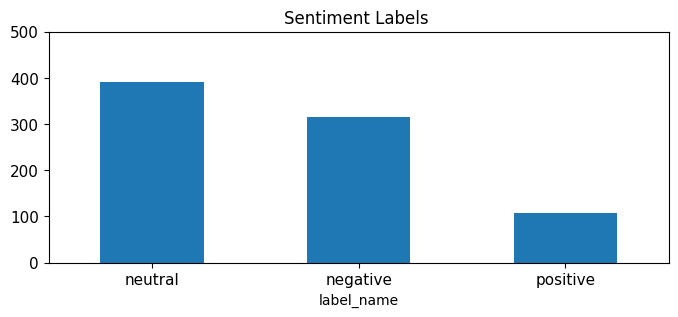

In [47]:
print(df.label_name.value_counts())

# plot barchart for df
df.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment Labels ',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_name
neutral     192
negative    161
positive     47
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Labels '}, xlabel='label_name'>

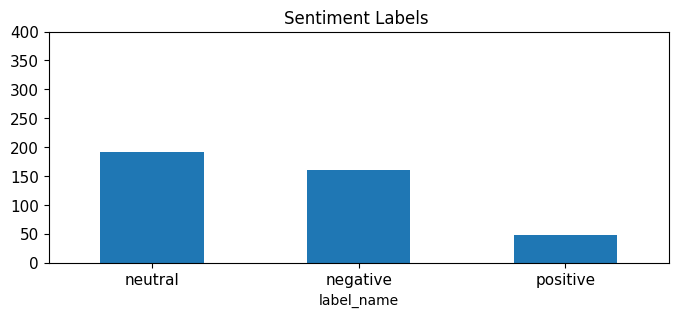

In [49]:
print(df_sample.label_name.value_counts())

# plot barchart for df
df_sample.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment Labels ',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [50]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: title={'center': 'Sentiment Labels '}, xlabel='label_name'>

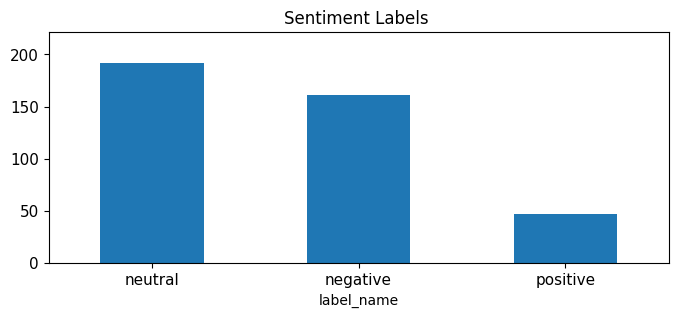

In [51]:
#excercise 7:
df_sample.label_name.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment Labels ',
                                           ylim = [0, df_sample.label_name.value_counts().max()+30], 
                                           rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Sentiment Labels '}>

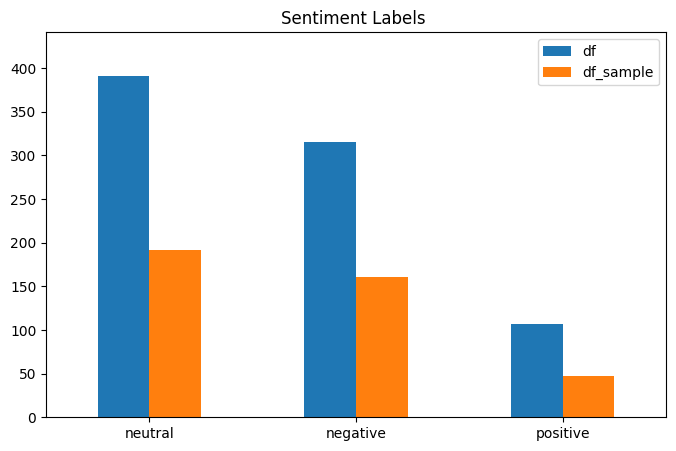

In [53]:
#excercise 8:
df_plot = pd.DataFrame({'df': df['label_name'].value_counts(), 
                   'df_sample': df_sample["label_name"].value_counts()})
df_plot.plot(kind='bar', 
        figsize=(8,5), 
        rot=0, fontsize=10, 
        ylim=[0, df_plot.values.max()+50], 
        title='Sentiment Labels ',
        xlabel='')

b. Feature Creation

In [54]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
 # takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [56]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [57]:
df[0:4]

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [58]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

c. Feature subset selection

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_count = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_count[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [60]:
count_vect.get_feature_names_out()[2106]

'investor'

In [62]:
analyze = count_vect.build_analyzer()

In [63]:
#excercise 9:
analyze(df.text[0])

['calls', 'on', 'retards']

In [64]:
# We can check the shape of this matrix by:
df_count.shape

(813, 4313)

In [65]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [66]:
df_count[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [67]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [68]:
count_vect.get_feature_names_out()[18]

'116'

In [69]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [70]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [71]:
plot_z = df_count[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

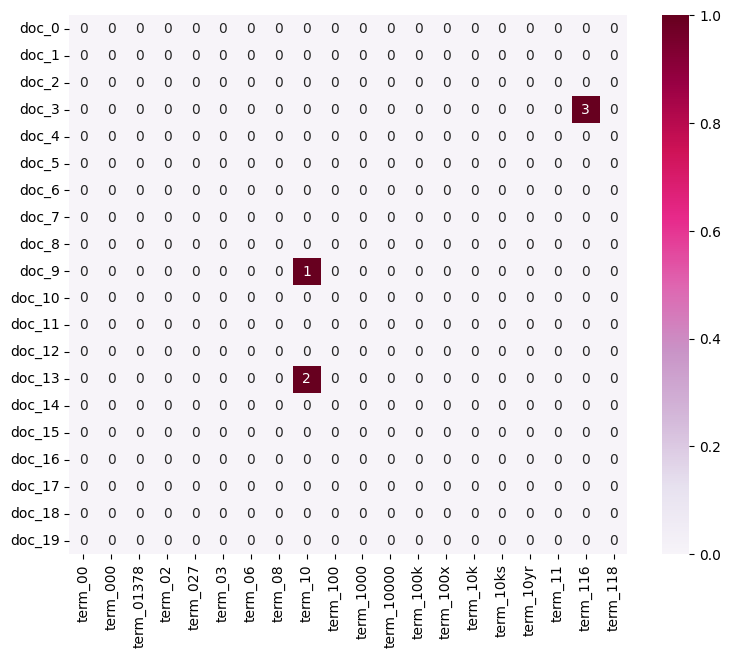

In [72]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

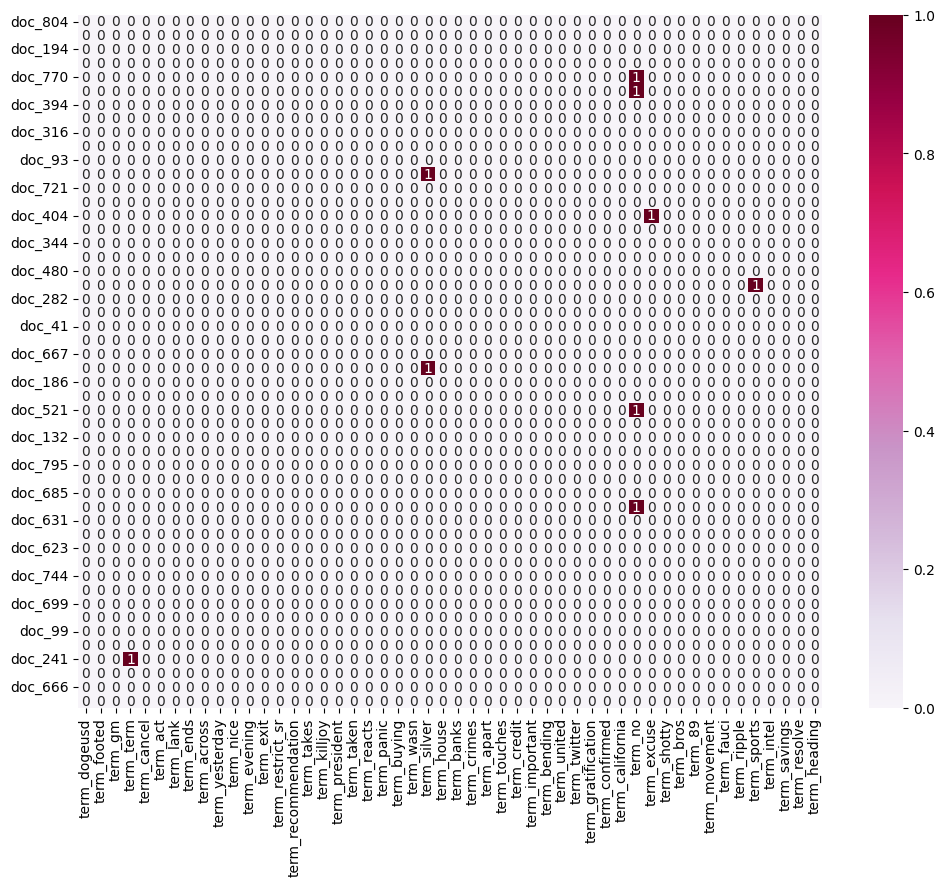

In [73]:
n_terms = 50
n_docs = 50
random_indices_terms = np.random.choice(df_count.shape[1], n_terms, replace=False)
terms = [count_vect.get_feature_names_out()[i] for i in random_indices_terms]
random_indices_docs = np.random.choice(df_count.shape[0], n_docs, replace=False)

plot_x = ["term_"+str(i) for i in terms]
plot_y = ["doc_"+ str(i) for i in random_indices_docs]
plot_z = df_count[random_indices_docs][:, random_indices_terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

d. Attribute Transformation / Aggregation

In [74]:
term_frequencies = []
for j in range(0,df_count.shape[1]):
    term_frequencies.append(sum(df_count[:,j].toarray()))


In [75]:
term_frequencies = np.asarray(df_count.sum(axis=0))[0]

In [76]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_26979/3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



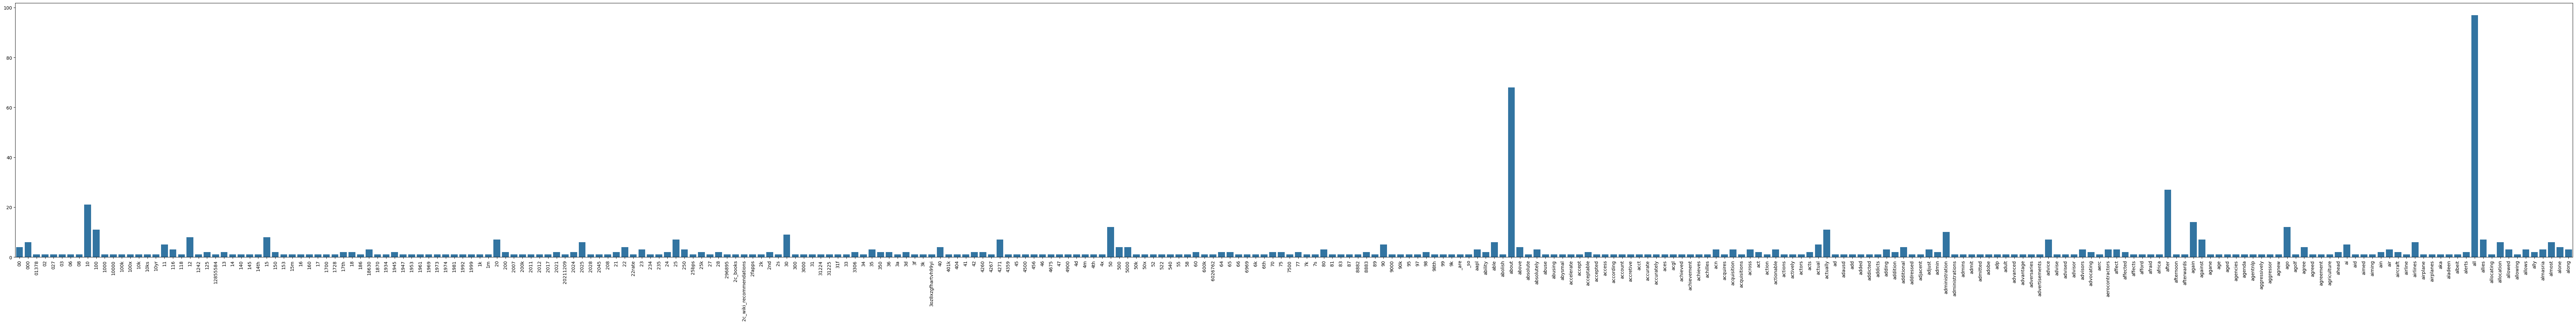

In [80]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [81]:
#excercise 12:
import plotly.graph_objects as go
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]
fig = go.Figure(data=[go.Bar(x=terms, 
                             y=frequencies,
                             marker_color='indianred')])
fig.update_layout(title='Term Frequencies for First 300 Terms',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

In [82]:
re_terms = count_vect.get_feature_names_out()[:50]
re_frequencies = term_frequencies[:50]
fig = go.Figure(data=[go.Bar(x=re_terms, 
                             y=re_frequencies,
                             marker_color='indianred')])
fig.update_layout(title='Term Frequencies for First 50 Terms',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500)
fig.show()

In [83]:
#excercise 14:
sorted_terms = count_vect.get_feature_names_out()[np.argsort(term_frequencies)][::-1][:50]
sorted_frequencies = term_frequencies[np.argsort(term_frequencies)][::-1][:50]

fig = go.Figure(data=[go.Bar(x=sorted_terms, 
                             y=sorted_frequencies,
                             marker_color='indianred')])
fig.update_layout(title='Long Tail Distribution - Top 50 Terms by Frequency',
                  xaxis_title='Terms',
                  yaxis_title='Frequencies',
                  xaxis_tickangle=-45,
                  width=1000, height=500,
                  showlegend=True)
fig.show()

In [84]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_26979/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



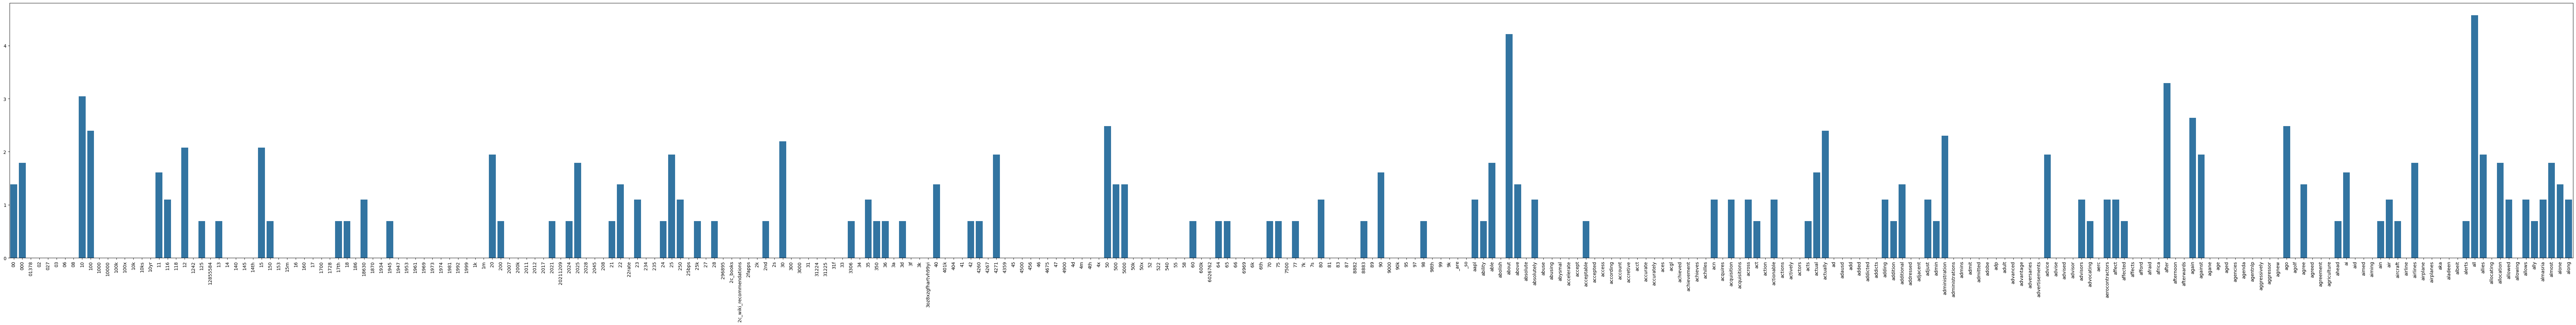

In [85]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

/var/folders/02/wd76cl5111998yc2yd1_vcv00000gn/T/ipykernel_26979/542717722.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



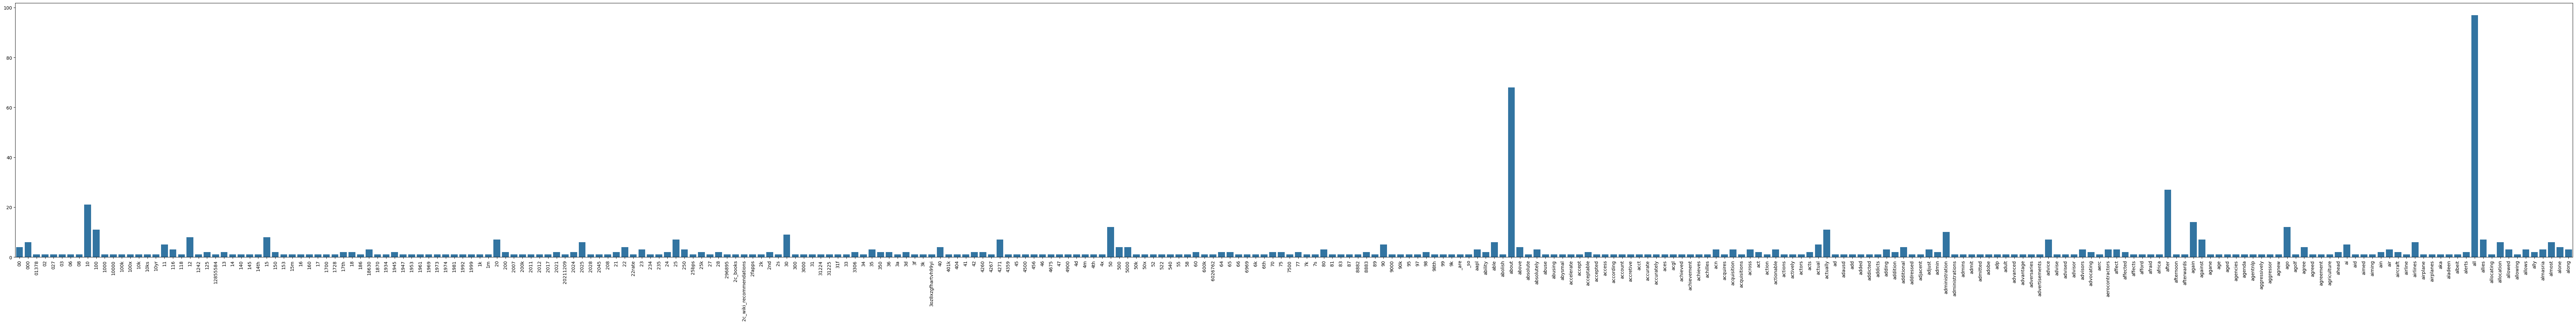

In [86]:
#excercise 15:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Phase 2

In [ ]:
### Begin Assignment Here